In [ ]:
# importing libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
!wget -O Fraud.csv --no-check-certificate 'https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV'

--2022-03-12 13:47:42--  https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV
Resolving drive.google.com (drive.google.com)... 142.250.81.206, 2607:f8b0:4004:82f::200e
Connecting to drive.google.com (drive.google.com)|142.250.81.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fn9ckr7gpjdf668a7ht0uadluqtbp6of/1647092850000/18066994120134464539/*/1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV?e=download [following]
--2022-03-12 13:47:42--  https://doc-08-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fn9ckr7gpjdf668a7ht0uadluqtbp6of/1647092850000/18066994120134464539/*/1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV?e=download
Resolving doc-08-3o-docs.googleusercontent.com (doc-08-3o-docs.googleusercontent.com)... 172.217.0.33, 2607:f8b0:4004:800::2001
Connecting to doc-08-3o-docs.googleusercontent.com (doc-08-3o-do

In [ ]:
# importing dataset
df = pd.read_csv("Fraud.csv")

In [ ]:
# showing head of the dataset
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

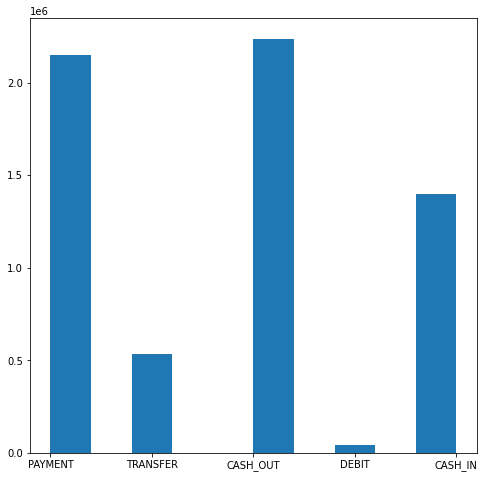

In [ ]:
plt.figure(figsize = (8,8))
plt.hist(df['type'])
plt.show()

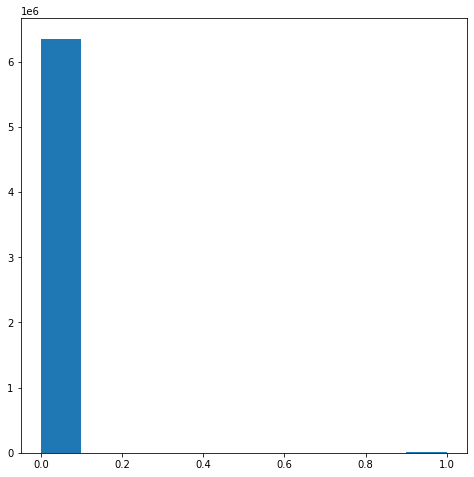

In [ ]:
plt.figure(figsize = (8,8))
plt.hist(df['isFraud'])
plt.show()
#The data is biased 

In [ ]:
# showing columns of dataset
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df = df.drop(columns = ['nameOrig','nameDest'], axis = 1)

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 9)

In [ ]:
# y1 is our target variable 
y = df['isFraud']

In [ ]:
y.shape

(6362620,)

In [ ]:
# checking how many fraud and genuine transections are there 
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
# It seems that dataset is having more than 85% biased data so we need to balance it 

In [ ]:
T_Trans = df[y==0]
F_Trans =  df[y==1]

In [ ]:
print(F_Trans.shape)
print(T_Trans.shape)

(8213, 9)
(6354407, 9)


In [ ]:
# describing the amount column of the dataset having true transaction 
T_Trans.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [ ]:
# describing the amount column of the dataset having False transaction 
F_Trans.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [ ]:
# finding the mean of the dataset
df.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,243.235663,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [ ]:
# taking equal values of true transaction to the fraud transaction by taking random 8213 true transactions. 
#to make our model more accurate
T_Trans_sample = T_Trans.sample(n=8213) 

In [ ]:
# concatinating two dataframes 
fdf = pd.concat([T_Trans_sample, F_Trans], axis = 0 )

In [ ]:
# new dataset after having 8213 true random transaction and False transaction
fdf

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4468589,324,CASH_OUT,786455.44,662.00,0.0,1879428.75,2665884.18,0,0
4369905,310,CASH_OUT,73018.92,0.00,0.0,3133529.78,3206548.70,0,0
6086323,522,CASH_OUT,441977.56,0.00,0.0,9511724.02,9953701.58,0,0
4887192,349,CASH_IN,300596.50,85692.00,386288.5,52446.19,0.00,0,0
104307,10,TRANSFER,1399898.92,11929.00,0.0,0.00,1558672.26,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0


In [ ]:
fdf['type'].value_counts()

CASH_OUT    6954
TRANSFER    4775
PAYMENT     2847
CASH_IN     1792
DEBIT         58
Name: type, dtype: int64

In [ ]:
# number of isFraud 1 and isFraud 0 are 8213 
fdf['isFraud'].value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [ ]:
tyep = {"type":     {"PAYMENT": 0, "CASH_OUT": 1, "TRANSFER" : 2, "CASH_IN":3, "DEBIT" : 4}}
fdf = fdf.replace(tyep)
fdf.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4468589,324,1,786455.44,662.0,0.0,1879428.75,2665884.18,0,0
4369905,310,1,73018.92,0.0,0.0,3133529.78,3206548.70,0,0
6086323,522,1,441977.56,0.0,0.0,9511724.02,9953701.58,0,0
4887192,349,3,300596.50,85692.0,386288.5,52446.19,0.00,0,0
104307,10,2,1399898.92,11929.0,0.0,0.00,1558672.26,0,0


In [ ]:
# storing the classes of dataset into new variable to use it further for our model
X = fdf.drop(columns = 'isFraud', axis = 1)

In [ ]:
# y is our target variable 
y = fdf[ 'isFraud']

In [ ]:
# train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, random_state = 252, stratify = y)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# evaluation 
# accuracy score
X_train_prediction = model.predict(X_train)


In [ ]:
# accuracy score of training data
training_data_accuracy = accuracy_score(X_train_prediction,y_train)


In [ ]:
print("accuracy score on training data", training_data_accuracy)

accuracy score on training data 0.9058966776830754


In [ ]:
# accuracy scoreof testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,y_test)


In [ ]:
print("accuracy score on testing data",testing_data_accuracy )

accuracy score on testing data 0.906452922077922
